In [81]:
### calling packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [82]:
### '서울시 월별 평균 대기오염도 정보.csv'를 ATM_monthly_df라는 데이터프레임 형태로 불러오기

ATM_monthly_df = pd.read_csv('C:/Users/izzle/Downloads/서울시 월별 평균 대기오염도 정보.csv', encoding='cp949')
ATM_monthly_df.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0
5,202301,강서구,0.036,0.016,0.8,0.004,77.0,41.0
6,202301,공항대로,0.039,0.012,0.7,0.003,67.0,41.0
7,202301,관악구,0.039,0.013,0.8,0.003,67.0,37.0
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0


In [83]:
### 결측치 확인

ATM_monthly_df.isnull().sum()

측정월                0
측정소명               0
이산화질소농도(ppm)     474
오존농도(ppm)        736
일산화탄소농도(ppm)     499
아황산가스(ppm)       758
미세먼지(㎍/㎥)       2422
초미세먼지(㎍/㎥)      8620
dtype: int64

### Processing data for 이산화질소

In [84]:
### 이산화질소농도 결측치가 있는 행 제거

nonna_NO2_df = ATM_monthly_df.dropna(subset=['이산화질소농도(ppm)'])
nonna_NO2_df.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0


In [85]:
### 결측치 재확인

nonna_NO2_df.isnull().sum()

측정월                0
측정소명               0
이산화질소농도(ppm)       0
오존농도(ppm)        276
일산화탄소농도(ppm)      41
아황산가스(ppm)       298
미세먼지(㎍/㎥)       1962
초미세먼지(㎍/㎥)      8156
dtype: int64

In [86]:
### 월 컬럼 따로 만들기

# pd.set_option('display.max_rows', None)

nonna_NO2_df['year'] = nonna_NO2_df['측정월']//100
nonna_NO2_df['month'] = nonna_NO2_df['측정월']%100
nonna_NO2_df.head(10)

C:\Users\izzle\AppData\Local\Temp\ipykernel_8704\1301091771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonna_NO2_df['year'] = nonna_NO2_df['측정월']//100
C:\Users\izzle\AppData\Local\Temp\ipykernel_8704\1301091771.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonna_NO2_df['month'] = nonna_NO2_df['측정월']%100


,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0,2023,1
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0,2023,1
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0,2023,1
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0,2023,1
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0,2023,1
5,202301,강서구,0.036,0.016,0.8,0.004,77.0,41.0,2023,1
6,202301,공항대로,0.039,0.012,0.7,0.003,67.0,41.0,2023,1
7,202301,관악구,0.039,0.013,0.8,0.003,67.0,37.0,2023,1
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0,2023,1
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1


In [87]:
### 데이터 타입

nonna_NO2_df.dtypes

측정월               int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
일산화탄소농도(ppm)    float64
아황산가스(ppm)      float64
미세먼지(㎍/㎥)       float64
초미세먼지(㎍/㎥)      float64
year              int64
month             int64
dtype: object

In [88]:
### 여름(6~8월) 데이터 추출하기

summer_NO2 = nonna_NO2_df[((nonna_NO2_df['month'] > 5) & (nonna_NO2_df['month'] < 9))]
summer_NO2.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
250,202208,강남구,0.016,0.034,0.3,0.003,21.0,12.0,2022,8
251,202208,강남대로,0.023,0.021,0.5,0.002,19.0,9.0,2022,8
252,202208,강동구,0.012,0.026,0.3,0.002,21.0,11.0,2022,8
253,202208,강변북로,0.026,0.019,0.4,0.002,20.0,10.0,2022,8
254,202208,강북구,0.009,0.031,0.3,0.002,23.0,11.0,2022,8
255,202208,강서구,0.014,0.034,0.4,0.003,21.0,12.0,2022,8
256,202208,공항대로,0.022,0.025,0.3,0.002,26.0,12.0,2022,8
257,202208,관악구,0.014,0.027,0.4,0.003,24.0,13.0,2022,8
258,202208,관악산,0.005,0.043,0.3,0.002,14.0,10.0,2022,8
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,2022,8


In [89]:
### 겨울(12~2월) 데이터 추출하기

winter_NO2 = nonna_NO2_df[((nonna_NO2_df['month'] == 12) | (nonna_NO2_df['month'] < 3))]
winter_NO2.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0,2023,1
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0,2023,1
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0,2023,1
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0,2023,1
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0,2023,1
5,202301,강서구,0.036,0.016,0.8,0.004,77.0,41.0,2023,1
6,202301,공항대로,0.039,0.012,0.7,0.003,67.0,41.0,2023,1
7,202301,관악구,0.039,0.013,0.8,0.003,67.0,37.0,2023,1
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0,2023,1
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1


### Two sample t-test for 이산화질소

H0: 이산화질소의 여름 평균과 겨울 평균은 같다  
H1: 이산화질소의 여름 평균이 겨울 평균보다 작다(단측검정)

In [90]:
summer_NO2 = summer_NO2['이산화질소농도(ppm)']
winter_NO2 = winter_NO2['이산화질소농도(ppm)']

In [91]:
### matplotlib, seaborn 한글 깨짐 현상 해결

from matplotlib import font_manager, rc # matplotlib, seaborn에서 한글 깨짐 현상을 해결하기 위함

font_path = "C:/WINDOWS/FONTS/MALGUNSL.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\izzle\AppData\Local\Temp\ipykernel_8704\2563381775.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=summer_NO2, color="red", shade=True)
C:\Users\izzle\AppData\Local\Temp\ipykernel_8704\2563381775.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=winter_NO2, color="blue", shade=True)


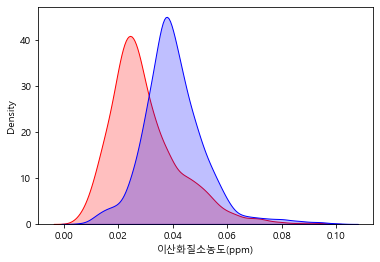

In [92]:
sns.kdeplot(data=summer_NO2, color="red", shade=True)
sns.kdeplot(data=winter_NO2, color="blue", shade=True)
plt.show()

In [107]:
t_stat, p_value = stats.ttest_ind(summer_NO2, winter_NO2, equal_var=True, alternative="less")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : -34.82077421477828, p-value : 1.2833711944613863e-244


p-value < 0.05 이므로 귀무가설을 기각할 수 있다.  
이산화질소의 여름 평균이 겨울 평균에 비해 낮다고 말할 수 있다. 즉, 이산화질소에 계절성이 존재한다.

### Processing data for 오존

In [108]:
### 오존농도 결측치가 있는 행 제거

nonna_O3_df = ATM_monthly_df.dropna(subset=['오존농도(ppm)'])
nonna_O3_df.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0


In [109]:
### 결측치 재확인

nonna_O3_df.isnull().sum()

측정월                0
측정소명               0
이산화질소농도(ppm)      14
오존농도(ppm)          0
일산화탄소농도(ppm)      40
아황산가스(ppm)        44
미세먼지(㎍/㎥)       1763
초미세먼지(㎍/㎥)      7890
dtype: int64

In [110]:
### 월 컬럼 따로 만들기

# pd.set_option('display.max_rows', None)

nonna_O3_df['year'] = nonna_O3_df['측정월']//100
nonna_O3_df['month'] = nonna_O3_df['측정월']%100
nonna_O3_df.head(10)

C:\Users\izzle\AppData\Local\Temp\ipykernel_8704\2375339861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonna_O3_df['year'] = nonna_O3_df['측정월']//100
C:\Users\izzle\AppData\Local\Temp\ipykernel_8704\2375339861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonna_O3_df['month'] = nonna_O3_df['측정월']%100


,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0,2023,1
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0,2023,1
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0,2023,1
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0,2023,1
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0,2023,1
5,202301,강서구,0.036,0.016,0.8,0.004,77.0,41.0,2023,1
6,202301,공항대로,0.039,0.012,0.7,0.003,67.0,41.0,2023,1
7,202301,관악구,0.039,0.013,0.8,0.003,67.0,37.0,2023,1
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0,2023,1
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1


In [111]:
### 데이터 타입

nonna_O3_df.dtypes

측정월               int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
일산화탄소농도(ppm)    float64
아황산가스(ppm)      float64
미세먼지(㎍/㎥)       float64
초미세먼지(㎍/㎥)      float64
year              int64
month             int64
dtype: object

In [112]:
### 여름(6~8월) 데이터 추출하기

summer_O3 = nonna_O3_df[((nonna_O3_df['month'] > 5) & (nonna_O3_df['month'] < 9))]
summer_O3.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
250,202208,강남구,0.016,0.034,0.3,0.003,21.0,12.0,2022,8
251,202208,강남대로,0.023,0.021,0.5,0.002,19.0,9.0,2022,8
252,202208,강동구,0.012,0.026,0.3,0.002,21.0,11.0,2022,8
253,202208,강변북로,0.026,0.019,0.4,0.002,20.0,10.0,2022,8
254,202208,강북구,0.009,0.031,0.3,0.002,23.0,11.0,2022,8
255,202208,강서구,0.014,0.034,0.4,0.003,21.0,12.0,2022,8
256,202208,공항대로,0.022,0.025,0.3,0.002,26.0,12.0,2022,8
257,202208,관악구,0.014,0.027,0.4,0.003,24.0,13.0,2022,8
258,202208,관악산,0.005,0.043,0.3,0.002,14.0,10.0,2022,8
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,2022,8


In [113]:
### 겨울(12~2월) 데이터 추출하기

winter_O3 = nonna_O3_df[((nonna_O3_df['month'] == 12) | (nonna_O3_df['month'] < 3))]
winter_O3.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0,2023,1
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0,2023,1
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0,2023,1
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0,2023,1
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0,2023,1
5,202301,강서구,0.036,0.016,0.8,0.004,77.0,41.0,2023,1
6,202301,공항대로,0.039,0.012,0.7,0.003,67.0,41.0,2023,1
7,202301,관악구,0.039,0.013,0.8,0.003,67.0,37.0,2023,1
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0,2023,1
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1


### Two sample t-test for 오존

H0: 오존의 여름 평균과 겨울 평균은 같다  
H1: 오존의 여름 평균이 겨울 평균보다 크다(단측검정)

In [114]:
summer_O3 = summer_O3['오존농도(ppm)']
winter_O3 = winter_O3['오존농도(ppm)']

In [115]:
### matplotlib, seaborn 한글 깨짐 현상 해결

from matplotlib import font_manager, rc # matplotlib, seaborn에서 한글 깨짐 현상을 해결하기 위함

font_path = "C:/WINDOWS/FONTS/MALGUNSL.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\izzle\AppData\Local\Temp\ipykernel_8704\362654470.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=summer_O3, color="red", shade=True)
C:\Users\izzle\AppData\Local\Temp\ipykernel_8704\362654470.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=winter_O3, color="blue", shade=True)


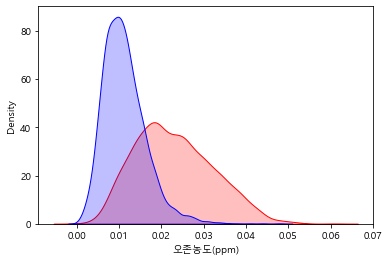

In [116]:
sns.kdeplot(data=summer_O3, color="red", shade=True)
sns.kdeplot(data=winter_O3, color="blue", shade=True)
plt.show()

In [117]:
t_stat, p_value = stats.ttest_ind(summer_O3, winter_O3, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 64.01937842143555, p-value : 0.0


p-value < 0.05 이므로 귀무가설을 기각할 수 있다.  
오존의 여름 평균이 겨울 평균보다 크다. 즉, 오존에 계절성이 존재한다고 볼 수 있다.